In [1]:
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

%matplotlib inline

In [2]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

data_train = pd.read_csv("./datas/train.csv")
data_test = pd.read_csv("./datas/test.csv")

data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data_train.info()

print('-'*20)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


销售价格：SalePrice


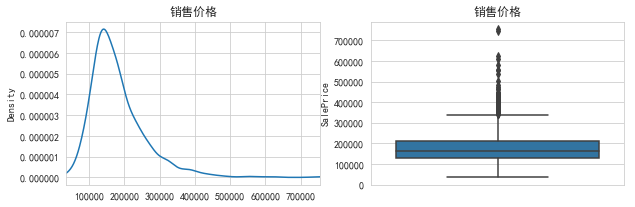

In [6]:
#查看要回归的属性：销售价格

fig = plt.figure(figsize=(10,3))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((1,2),(0,0))             # 在一张大图里分列几个小图
data_train.SalePrice.plot(kind='kde',xlim=(data_train.SalePrice.min(),data_train.SalePrice.max())) 
plt.title(u"销售价格") # 标题


plt.subplot2grid((1,2),(0,1))             # 在一张大图里分列几个小图
sns.boxplot( y="SalePrice", data=data_train)
plt.title(u"销售价格") # 标题

print(u'销售价格：SalePrice')

In [162]:
def showData(t,featereName,featureId):
    
    print(data_train[featureId].describe())
    
    _, ((axis1,axis2,axis3),(axis4,axis5,axis6)) = plt.subplots(2,3,figsize=(18,7))
    if t ==0:
        
        order = data_train[featureId].unique()
        print(order)
        
        sns.stripplot(x=featureId, y="SalePrice", data=data_train, ax=axis1)

        sns.barplot(x=featureId, y="SalePrice", data=data_train, ax=axis2, ci='sd').set_title(featereName)

        sns.boxplot(x=featureId, y="SalePrice", data=data_train, ax=axis3)

        sns.pointplot(x=featureId, y="SalePrice", data=data_train, ax=axis4, ci='sd')

        sns.countplot(x=featureId, data=data_train, ax=axis5,)

        sns.violinplot(x=featureId, y="SalePrice", data=data_train, ax=axis6)
    
    elif t ==1:
        data_train[featureId].plot(ax=axis1, kind ='kde')
        
        #data_train.plot(x=featureId, y='SalePrice',ax=axis2, kind ='scatter',title = featereName)
        sns.regplot(x=featureId, y="SalePrice", data=data_train, ax=axis2)

        data_train[featureId].plot(ax=axis3, kind ='box')

        data_train[featureId].plot(ax=axis4, kind ='hist')

        data_train.plot(x=featureId, y='SalePrice',ax=axis5, kind ='hexbin')

        data_train.plot(x=featureId, y='SalePrice',ax=axis6, kind ='area')

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


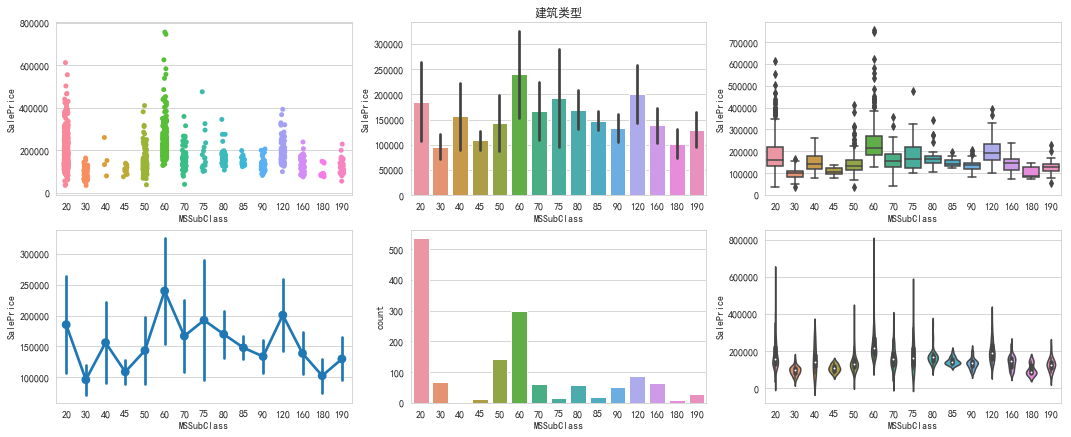

In [163]:
#建筑类型
featereName = u'建筑类型'
featureId = 'MSSubClass'

showData(0,featereName,featureId)

#有一些明显的属性

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
['RL' 'RM' 'C (all)' 'FV' 'RH']


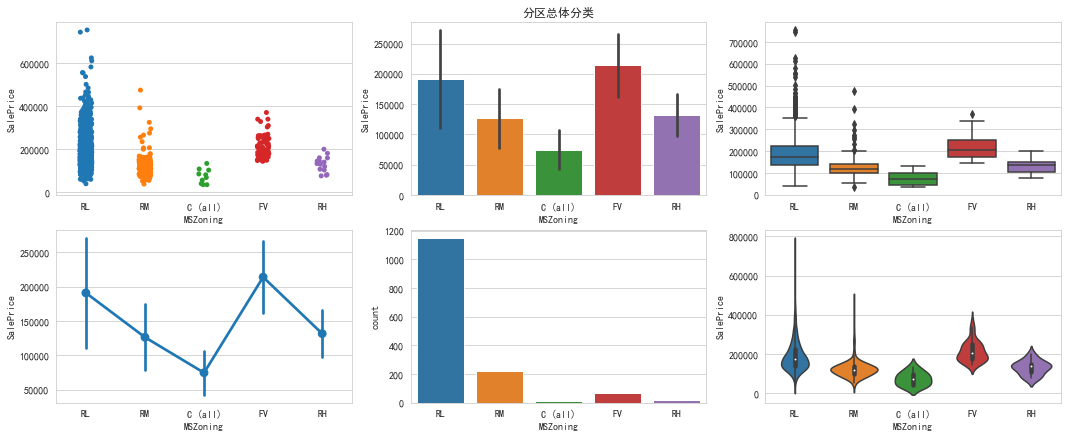

In [164]:
featereName = u'分区总体分类'
featureId = 'MSZoning'

showData(0,featereName,featureId)

#较明显的属性

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


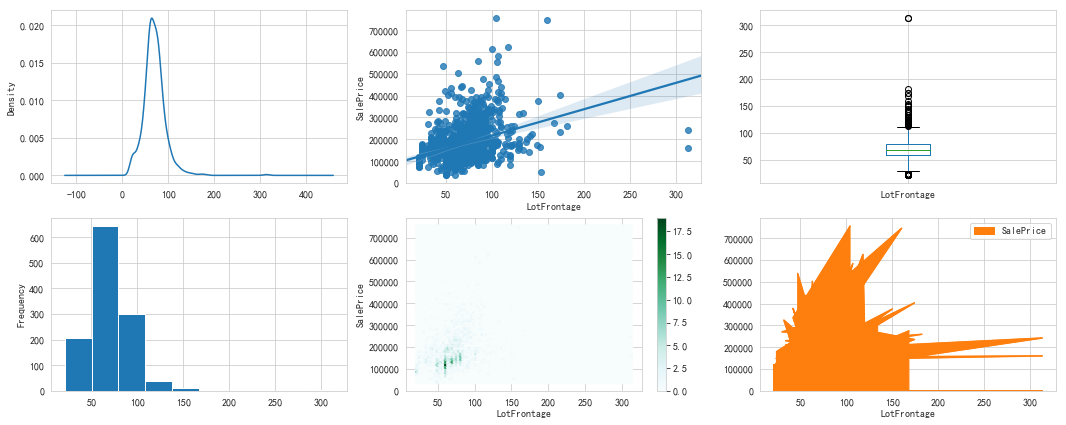

In [165]:
featereName = u'连接房产的距离'
featureId = 'LotFrontage'

showData(1,featereName,featureId)

#有缺失值
#有一些趋势

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


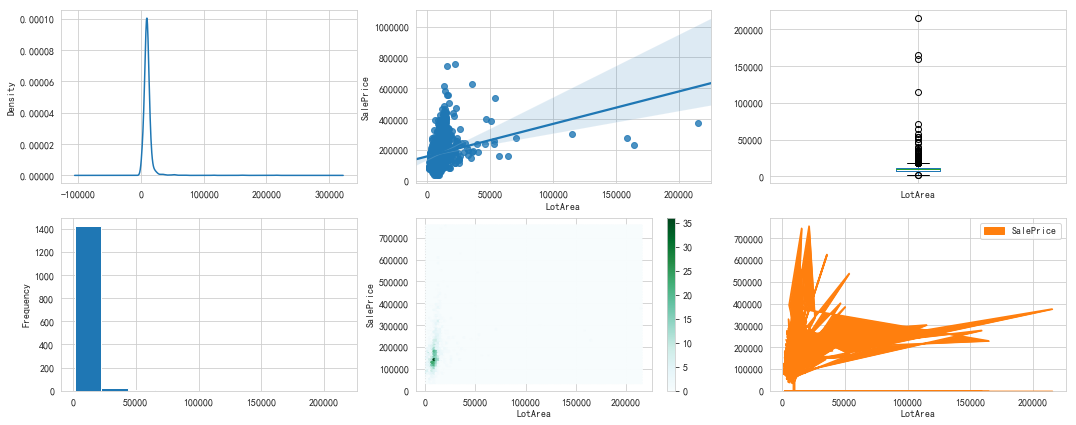

In [166]:
featereName = u'占地面积'
featureId = 'LotArea'

showData(1,featereName,featureId)

        
#相对明显的趋势

count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
['Pave' 'Grvl']


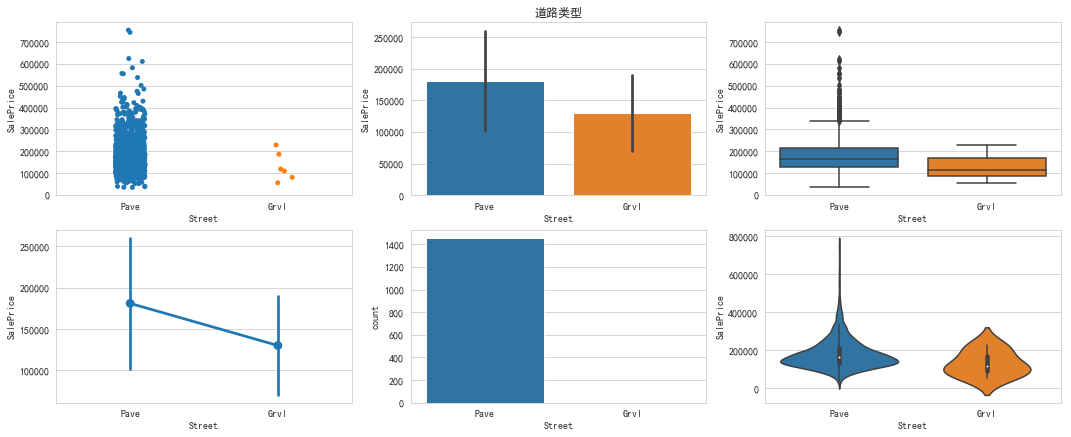

In [167]:
featereName = u'道路类型'
featureId = 'Street'

showData(0,featereName,featureId)

#建议舍弃，样本比例超级失衡

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
[nan 'Grvl' 'Pave']


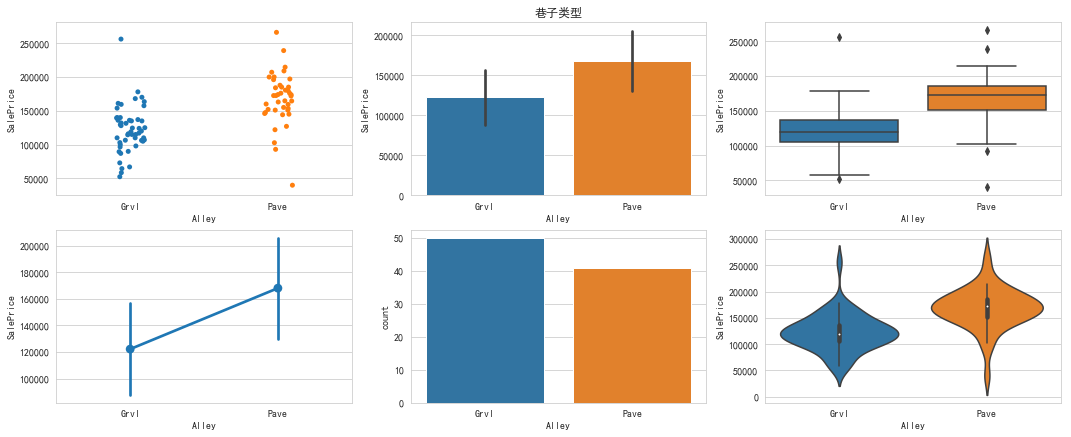

In [168]:
featereName = u'巷子类型'
featureId = 'Alley'

showData(0,featereName,featureId)

#信息还是附带了一些
#建议舍弃，样本缺失严重

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object
['Reg' 'IR1' 'IR2' 'IR3']


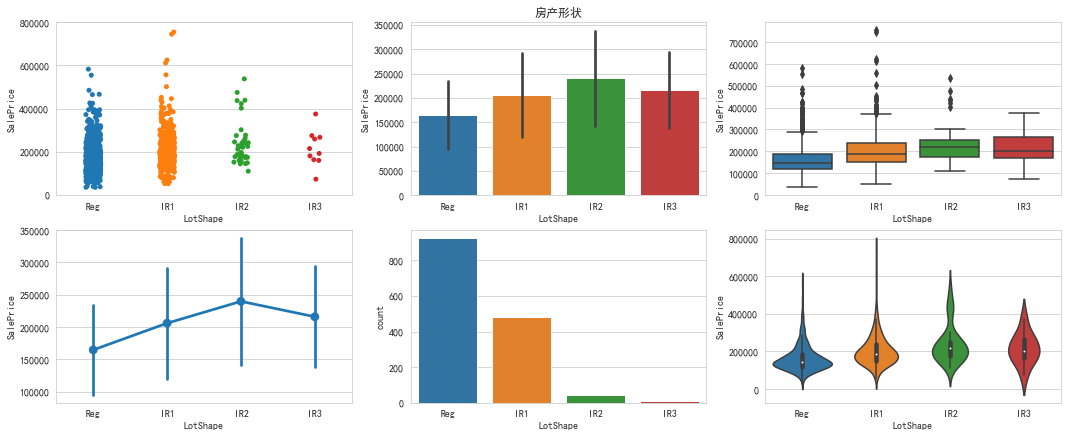

In [169]:
featereName = u'房产形状'
featureId = 'LotShape'

showData(0,featereName,featureId)

#样本分布比较不均衡